In [1]:
# packages
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# avoid converter warning
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# reading data
data = pd.read_csv('Reviews.csv')[:10000]
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# Top-10 Reviewer

In [3]:
# pick certain data
df = data[['UserId', 'ProfileName', 'Score']]
df = df.sort_values(by=['UserId', 'ProfileName'])
df.head()

,UserId,ProfileName,Score
5685,A10012K7DF3SBQ,Terri Yang,3
5053,A1001TYW5FZYD9,"Anne Thompson ""dreamsinger41""",5
9729,A1008DPSP6KC9J,Lee F,5
6705,A101C99CG8EFUH,Benjamin McGough,3
3818,A102XKYZE9Q9L4,"TjB ""cancer-free!""",5


In [4]:
# check duplicates
mask = df.duplicated(subset='ProfileName') == True
df[mask].head()

,UserId,ProfileName,Score
8523,A10H24TDLK2VDP,William Jens Jensen,3
8702,A10H24TDLK2VDP,William Jens Jensen,3
9231,A10H24TDLK2VDP,William Jens Jensen,3
9232,A10H24TDLK2VDP,William Jens Jensen,3
9411,A10H24TDLK2VDP,William Jens Jensen,3


### group each entity

In [5]:
groups = df.groupby(by=['UserId', 'ProfileName'], as_index=False)

In [6]:
# count the profile
score_count = groups.count()
score_count.head()

,UserId,ProfileName,Score
0,A10012K7DF3SBQ,Terri Yang,1
1,A1001TYW5FZYD9,"Anne Thompson ""dreamsinger41""",1
2,A1008DPSP6KC9J,Lee F,1
3,A101C99CG8EFUH,Benjamin McGough,1
4,A102XKYZE9Q9L4,"TjB ""cancer-free!""",1


In [7]:
# calculate the average
score_mean = groups.mean()
score_mean.head()

,UserId,ProfileName,Score
0,A10012K7DF3SBQ,Terri Yang,3.0
1,A1001TYW5FZYD9,"Anne Thompson ""dreamsinger41""",5.0
2,A1008DPSP6KC9J,Lee F,5.0
3,A101C99CG8EFUH,Benjamin McGough,3.0
4,A102XKYZE9Q9L4,"TjB ""cancer-free!""",5.0


In [8]:
# combine to a new dataframe
result = score_count[['UserId', 'ProfileName']]
result['Score count'] = score_count['Score']
result['Score mean'] = score_mean['Score']
result = result.sort_values(by='Score count', ascending=False).reset_index(drop=True)
result.head(10)

,UserId,ProfileName,Score count,Score mean
0,A1Z54EM24Y40LL,c2,17,3.882353
1,A2SZLNSI5KOQJT,"Carrie, ""Formerly &#34;Sister Carrie&#34;""",10,3.800000
2,A35R32TA60XD57,M. Torma,9,4.111111
3,A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",8,5.000000
4,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",7,4.428571
5,A3NHUQ33CFH3VM,Citizen John,7,3.142857
6,A3PJZ8TU8FDQ1K,Jared Castle,7,4.714286
7,AQ6SHOW0VMZGF,"K. Padgett ""familyof5""",6,2.666667
8,A26NFIQ7KWI8Y7,kt rose,6,2.666667
9,A10H24TDLK2VDP,William Jens Jensen,6,3.000000


# Plot score distribution for the user with the most number of reviews

In [9]:
# dataframe already sorted, so check the first
most_review = result.loc[0, 'ProfileName']
print('most reviewed profile:', most_review)

mask = df['ProfileName'] == most_review
most_df = df[mask].reset_index(drop=True)
most_df

most reviewed profile: c2


,UserId,ProfileName,Score
0,A1Z54EM24Y40LL,c2,5
1,A1Z54EM24Y40LL,c2,5
2,A1Z54EM24Y40LL,c2,5
3,A1Z54EM24Y40LL,c2,3
4,A1Z54EM24Y40LL,c2,4
5,A1Z54EM24Y40LL,c2,4
6,A1Z54EM24Y40LL,c2,5
7,A1Z54EM24Y40LL,c2,2
8,A1Z54EM24Y40LL,c2,5
9,A1Z54EM24Y40LL,c2,3


### countplot

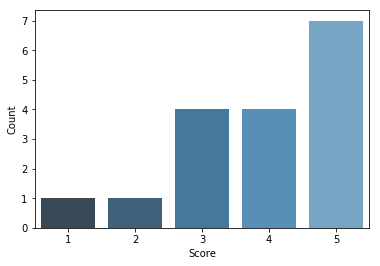

In [10]:
ax = sb.countplot(x=most_df['Score'], palette=sb.color_palette("Blues_d"))
ax.set(xlabel='Score', ylabel='Count')
plt.show()

### barplot, same result as countplot

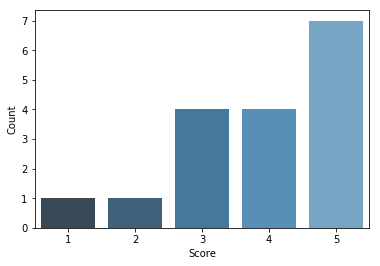

In [11]:
temp = most_df['Score'].value_counts()
ax = sb.barplot(x=temp.index, y=temp.values, palette=sb.color_palette("Blues_d"))
ax.set(xlabel='Score', ylabel='Count')
plt.show()

### displot, the xtick won't fit

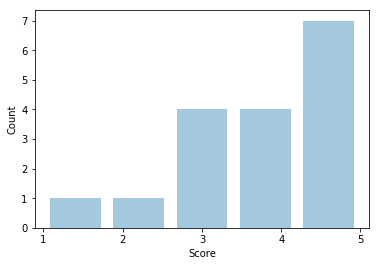

In [12]:
ax = sb.distplot(most_df['Score'], bins=5, kde=False, hist_kws={'rwidth': 0.8})
ax.set_xticks([1, 2, 3, 4, 5])
ax.set(xlabel='Score', ylabel='Count')
plt.show()

# Plot pandas Series DataFrame (Time->Date)

In [13]:
# transform timestamp to datetime
ss = pd.to_datetime(data['Time'], unit='s')
# count the date
ss = ss.value_counts().sort_index()
ss.head()

2000-06-23    1
2000-06-29    1
2004-01-30    1
2004-04-10    1
2004-05-02    1
Name: Time, dtype: int64

### use pyplot, seaborn doesn't well support custom datetime tick

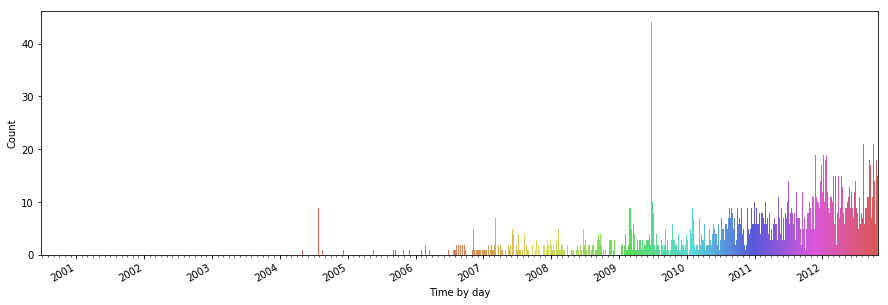

In [14]:
fig, ax = plt.subplots(figsize=(15, 5))
# avoid too many xticks
fig.autofmt_xdate()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# avoid right side void
plt.xlim([ss.index[0], ss.index[-1]])
ax.set(xlabel='Time by day', ylabel='Count')
ax.bar(ss.index, ss.values, width=1, color=sb.color_palette('hls', len(ss)))
plt.show()

### count by month

In [15]:
xx = ss.resample('M').count()
xx.head()

2000-06-30    2
2000-07-31    0
2000-08-31    0
2000-09-30    0
2000-10-31    0
Freq: M, Name: Time, dtype: int64

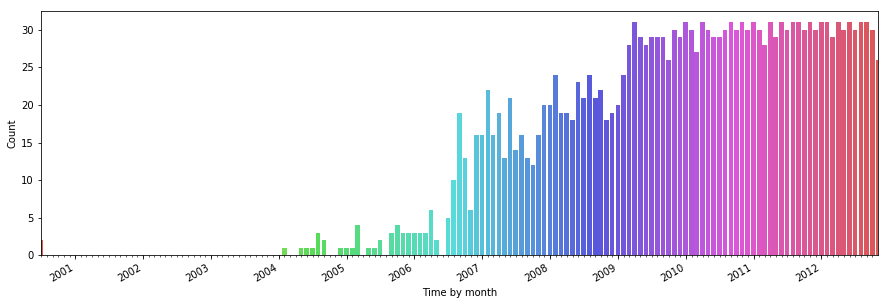

In [16]:
fig, ax = plt.subplots(figsize=(15, 5))
# avoid too many xticks
fig.autofmt_xdate()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# avoid right side void
plt.xlim([xx.index[0], xx.index[-1]])
ax.set(xlabel='Time by month', ylabel='Count')
ax.bar(xx.index, xx.values, width=25, color=sb.color_palette("hls", len(xx)))
plt.show()

### formatter doesn't work in seaborn

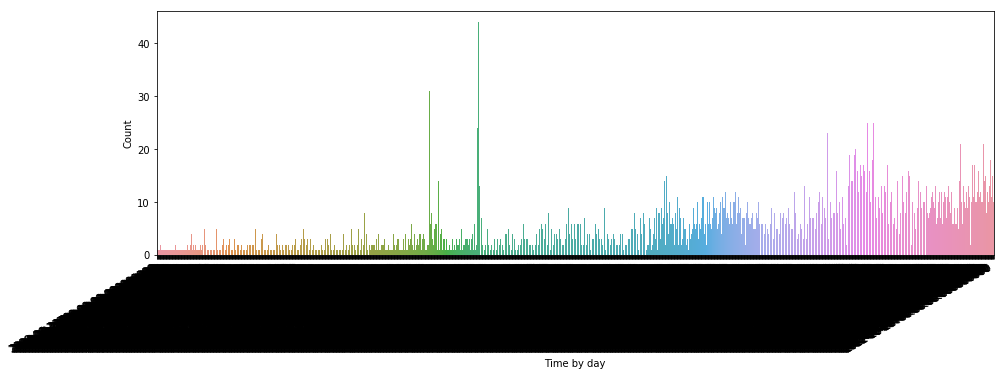

In [17]:
fig, ax = plt.subplots(figsize=(15, 5))

fig.autofmt_xdate()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax.set(xlabel='Time by day', ylabel='Count')
sb.barplot(ss.index, ss.values, ax=ax)
plt.show()

# Plot HeatMap

In [18]:
df2 = data[['Id', 'HelpfulnessNumerator','HelpfulnessDenominator', 'Score', 'Time']].copy()
df2.head()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
0,1,1,1,5,1303862400
1,2,0,0,1,1346976000
2,3,1,1,4,1219017600
3,4,3,3,2,1307923200
4,5,0,0,5,1350777600


In [19]:
# calculate the correlation
corr = df2.corr()
corr

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
Id,1.000000,0.013141,0.010480,-0.022696,0.030299
HelpfulnessNumerator,0.013141,1.000000,0.969580,-0.024280,-0.178248
HelpfulnessDenominator,0.010480,0.969580,1.000000,-0.102559,-0.197157
Score,-0.022696,-0.024280,-0.102559,1.000000,-0.034358
Time,0.030299,-0.178248,-0.197157,-0.034358,1.000000


In [20]:
# adjust the value of colormap
print(corr.max())
print(corr.mean())
print(corr.min())

Id                        1.0
HelpfulnessNumerator      1.0
HelpfulnessDenominator    1.0
Score                     1.0
Time                      1.0
dtype: float64
Id                        0.206245
HelpfulnessNumerator      0.356038
HelpfulnessDenominator    0.336069
Score                     0.163221
Time                      0.124107
dtype: float64
Id                       -0.022696
HelpfulnessNumerator     -0.178248
HelpfulnessDenominator   -0.197157
Score                    -0.102559
Time                     -0.197157
dtype: float64


### heatmap

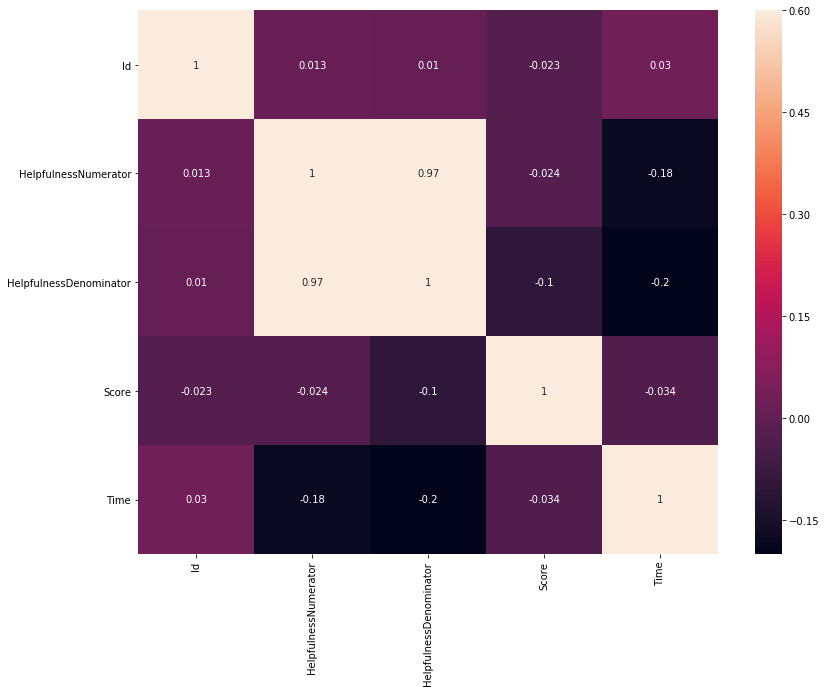

In [21]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(13, 10))
sb.heatmap(corr, vmin=-0.2, vmax=0.6, annot=True, ax=ax)
plt.show()

# Helpful percent

In [22]:
df3 = data[['ProfileName', 'HelpfulnessNumerator','HelpfulnessDenominator']].copy()
df3.head()

,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator
0,delmartian,1,1
1,dll pa,0,0
2,"Natalia Corres ""Natalia Corres""",1,1
3,Karl,3,3
4,"Michael D. Bigham ""M. Wassir""",0,0


In [23]:
# check ratio > 1
mask = df3['HelpfulnessNumerator'] > df3['HelpfulnessDenominator']
df3[mask]

,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator


In [24]:
# add new column
df3.loc[:, 'Percent'] = 0
df3.head()

,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Percent
0,delmartian,1,1,0
1,dll pa,0,0,0
2,"Natalia Corres ""Natalia Corres""",1,1,0
3,Karl,3,3,0
4,"Michael D. Bigham ""M. Wassir""",0,0,0


### only need to check zero division and equal

In [25]:
mask = df3['HelpfulnessDenominator'] == 0
df3.loc[mask, 'Percent'] = -1
df3.loc[~mask, 'Percent'] = df3.loc[~mask, 'HelpfulnessNumerator'] / df3.loc[~mask, 'HelpfulnessDenominator']
df3.head()

,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Percent
0,delmartian,1,1,1.0
1,dll pa,0,0,-1.0
2,"Natalia Corres ""Natalia Corres""",1,1,1.0
3,Karl,3,3,1.0
4,"Michael D. Bigham ""M. Wassir""",0,0,-1.0


### displot

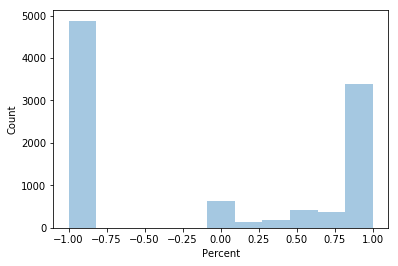

In [26]:
ax = sb.distplot(df3['Percent'], kde=False)
ax.set(xlabel='Percent', ylabel='Count')
plt.show()